# Non-linear gravity inversion: Grid search

> **Inversion concepts for multi-method geophysics**
>
> In case of questions, feel free to contact me:
>
> | Name                     | Email                               |
> |--------------------------|-------------------------------------|
> | Prof. Dr. Florian Wagner | <florian.wagner@gim.rwth-aachen.de> |

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Due to karstification processes in the subsurface, large cavities can
form, which may ultimately collapse posing substantial risks to human
life and infrastructures (See [this
example](https://www.independent.co.uk/news/science/sinkholes-what-are-they-how-do-they-form-and-why-are-we-seeing-so-many-9136235.html)
from Guatemala in 2010). Fortunately, cavities represent large density
contrasts, such that they can be detected using gravimetric measurements
(measuring local anomalies in gravitational acceleration). The dataset
contains 50 equally spaced readings (given in mGal) along a profile from
-50 to 50 meters. The anomaly is expected within the center of the
profile. The analytical solution for a spheric anomaly in the subsurface
is given by:

$$
\Delta\mathrm{g}_{\mathrm{z}}=\mathrm{G} \frac{4}{3} \pi \mathrm{R}^{3} \Delta \rho \frac{\mathrm{z}}{\left(\mathrm{x}^{2}+\mathrm{z}^{2}\right)^{3 / 2}}
$$

where $\Delta\mathrm{g}_{\mathrm{z}}$ is the vertical component of the
gravimetric anomaly in m/s$^2$, $G$ is the gravitational constant
(6.6743 $\times 10^{-11}$ m$^3$/(kg $\times$ s$^2$)), $R$ is the radius
of the sphere in meter, $\Delta \rho$ is the density contrast between
the anomaly and the surrounding rock in kg/m$^3$, $z$ is the depth of
the center of the sphere, and $x$ is the location along the profile.
Both $x$ and $z$ are in meters.

We have the following a priori information:

-   The surrounding rock is expected to have a density of
    $3000 \frac{kg}{m^3}$.
-   A basaltic bedrock is located at $50 m$ depth.
-   Maximum radii of anomalies within the same region were measured to
    be $25 m$.

Estimate the radius and the depth of the cavity using a grid-search
procedure. Visualize the misfit (prediction error) as a function of both
parameters. Is there a global minimum?

First the measured data is loaded and visualized:

Text(0, 0.5, 'Gravity anomaly (mGal)')

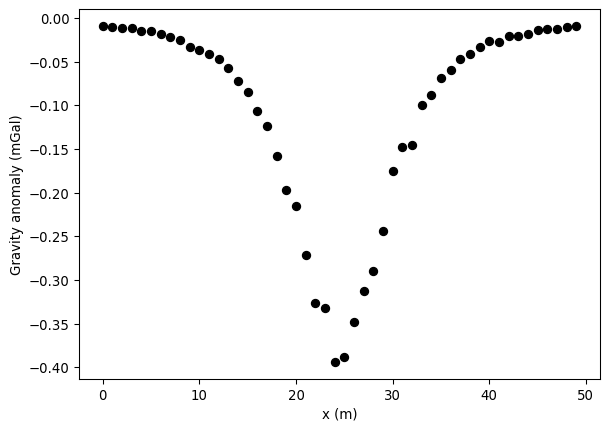

In [3]:
# Load
dobs = np.loadtxt("data.dat")
# Visualize
plt.plot(dobs, "ko")
plt.xlabel("x (m)")
plt.ylabel("Gravity anomaly (mGal)")

## 1 Now define your auxiliary variables, such as measurement locations and all the constants you need, including your expected density contrast.

Put the equation above in a Python function. This is your forward
operator (i.e., G is a function now, not a matrix anymore!). Which
parameters should the forward operator depend on?

*Hint*: Take care that your forward operator and the measured data have
the same units!

The forward operator should depend on the anomaly radius and depth,
since these are the parameters we’re inverting for.

## 2 Trying some parameters and visualizing the model response

Now we can test different model hypotheses and simulate their response.

Start with a constant radius and try different anomaly depths. Visualize
the different models and their response in two separate plots. Some
plotting advice:

You can create several subplots by using fig, ax =
[plt.subplots()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html).

To get the same color for the same model in both plots you can store the
first one like: line, = ax.plot(x, y). By using color=line.get_color()
in the second plot’s arguments you ensure your model has the same color
as the corresponding resonse.

*Plotting Hints*

You can create circular objects using
[plt.Circle()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.patches.Circle.html?highlight=circle#matplotlib.patches.Circle)
and add them to a subplot via
[ax.add_artist()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.add_artist.html?highlight=add_artist#matplotlib.axes.Axes.add_artist).

In order to keep the aspect ratio equal you can use
[ax.set_aspect()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html)

## 3 Grid search (brute force) procedure

Now that the forward operator is working the full grid search can
commence.

## 4 Think of useful value ranges to test for each parameter, which you can then create using [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace).

Check the given a priori information above.<br>To find an optimum you
also need to create an objective function that returns the norm of the
prediction error, as well as an appropriately shaped array to store the
objective function evaluations. The
[argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html?highlight=argmin#numpy.argmin)
function helps you find the index of the optimum.  
*Hint: you can use
[np.unravel_index()](https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html)
to get the coordinates of the optimal parameters*

*Hint*: Given a set of parameter ranges, the
[meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
function can create two grids in matrix form that reflect the possible
parameter combinations. This is useful to determine the corresponding
parameters once you have found an optimum.

*Hint*: To loop over a set of items while also getting their indices
returned, use the
[enumerate](https://www.programiz.com/python-programming/methods/built-in/enumerate)
function

## 5 Visualizing the prediction error for all combinations of R and z

You can now plot the grid search results. Besides the optimum you should
also have a matrix with the norm of prediction errors, which you can
plot
[discretely](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html)
or
[continuously](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.pcolor.html?highlight=pcolor#matplotlib.axes.Axes.pcolor).
Plot the minimum into the parameter space and highlight the
corresponding parameters by drawing
[horizontal](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hlines.html?highlight=hline#matplotlib.pyplot.hlines)
and
[vertical](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.vlines.html#matplotlib.pyplot.vlines)
lines from the minimum toward the axes.

## 6 Visualizing final result (global minimum)

Now visualize the model corresponding to the optimum. Plot the response
and the model into separate coorinate systems like you did above (Task
2).